# IMPORT LIBRARIES

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import norm, skew, boxcox
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, plot_confusion_matrix, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import roc_curve
%matplotlib inline
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import scikitplot
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# A.DATA SELECTION

# LOADING DATA

In [3]:
train_data = pd.read_csv("D:\MSc DATAANALYTICS\FIRST SEMESTER\PROJECTS\DATAMINING AND MACHINE LEARNING\Chess_data\games.csv")

# B.DATA PRE-PROCESSING

# UNDERSTAND THE DATA

In [4]:
#DISPLAYING THE COLUMNS IN TRAIN_DATA
print(train_data.columns)

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')


In [5]:
#DISPLAYING THE FEW ROWS OF DATA
train_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [6]:
#STATISTIC VALUES OF NUMERICAL COLUMNS ARE CHECKING USING DESCRIBE FUNCTION
train_data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [7]:
#DATATYPES AND COUNTS ARE CHECKED BY USING INFO FUNCTION
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


# CHECKING VALUE COUNTS

In [8]:
#rated
print("{} \n".format(train_data["rated"].value_counts()))
print("null value number -- > {} \n".format(train_data["rated"].isnull().sum()))



True     16155
False     3903
Name: rated, dtype: int64 

null value number -- > 0 



In [9]:
#created_at
print("{} \n".format(train_data["created_at"].value_counts()))
print("null value number -- > {} \n".format(train_data["created_at"].isnull().sum()))

1.504210e+12    45
1.504140e+12    39
1.504200e+12    38
1.503860e+12    37
1.504050e+12    32
                ..
1.489877e+12     1
1.400759e+12     1
1.484164e+12     1
1.503804e+12     1
1.503239e+12     1
Name: created_at, Length: 13151, dtype: int64 

null value number -- > 0 



In [10]:
#last_move_at
print("{} \n".format(train_data["last_move_at"].value_counts()))
print("null value number -- > {} \n".format(train_data["last_move_at"].isnull().sum()))

1.504210e+12    46
1.504140e+12    39
1.504200e+12    35
1.503860e+12    34
1.504040e+12    33
                ..
1.418230e+12     1
1.504124e+12     1
1.501878e+12     1
1.504118e+12     1
1.503239e+12     1
Name: last_move_at, Length: 13186, dtype: int64 

null value number -- > 0 



In [11]:
#turns
print("{} \n".format(train_data["turns"].value_counts()))
print("null value number -- > {} \n".format(train_data["turns"].isnull().sum()))

53     303
45     302
51     299
57     297
39     297
      ... 
218      1
216      1
201      1
212      1
255      1
Name: turns, Length: 211, dtype: int64 

null value number -- > 0 



In [12]:
#victory_status
print("{} \n".format(train_data["victory_status"].value_counts()))
print("null value number -- > {} \n".format(train_data["victory_status"].isnull().sum()))

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64 

null value number -- > 0 



In [13]:
#winner
print("{} \n".format(train_data["winner"].value_counts()))
print("null value number -- > {} \n".format(train_data["winner"].isnull().sum()))

white    10001
black     9107
draw       950
Name: winner, dtype: int64 

null value number -- > 0 



In [14]:
#increment_code
print("{} \n".format(train_data["increment_code"].value_counts()))
print("null value number -- > {} \n".format(train_data["increment_code"].isnull().sum()))

10+0      7721
15+0      1311
15+15      850
5+5        738
5+8        697
          ... 
11+9         1
60+20        1
30+150       1
30+7         1
1+13         1
Name: increment_code, Length: 400, dtype: int64 

null value number -- > 0 



In [15]:
#white_id
print("{} \n".format(train_data["white_id"].value_counts()))
print("null value number -- > {} \n".format(train_data["white_id"].isnull().sum()))

taranga          72
chess-brahs      53
a_p_t_e_m_u_u    49
bleda            48
ssf7             48
                 ..
tareed            1
maxgy             1
gr_vlasov         1
shadd             1
fitricter         1
Name: white_id, Length: 9438, dtype: int64 

null value number -- > 0 



In [16]:
#white_rating
print("{} \n".format(train_data["white_rating"].value_counts()))
print("null value number -- > {} \n".format(train_data["white_rating"].isnull().sum()))

1500    812
1480     51
1400     48
1536     46
1708     45
       ... 
801       1
899       1
915       1
931       1
2485      1
Name: white_rating, Length: 1516, dtype: int64 

null value number -- > 0 



In [17]:
#black_id
print("{} \n".format(train_data["black_id"].value_counts()))
print("null value number -- > {} \n".format(train_data["black_id"].isnull().sum()))

taranga               82
vladimir-kramnik-1    60
a_p_t_e_m_u_u         47
king5891              44
docboss               44
                      ..
leolayon               1
o2ga                   1
lovag                  1
sumitan                1
lev_chistov62          1
Name: black_id, Length: 9331, dtype: int64 

null value number -- > 0 



In [18]:
#black_rating
print("{} \n".format(train_data["black_rating"].value_counts()))
print("null value number -- > {} \n".format(train_data["black_rating"].isnull().sum()))

1500    797
1400     69
1501     53
1810     49
1562     45
       ... 
2359      1
1000      1
2284      1
2316      1
934       1
Name: black_rating, Length: 1521, dtype: int64 

null value number -- > 0 



In [19]:
#moves
print("{} \n".format(train_data["moves"].value_counts()))
print("null value number -- > {} \n".format(train_data["moves"].isnull().sum()))

e4 e5                                                                                                                                                                                                                                                                                                                                                                                           27
e4 d5                                                                                                                                                                                                                                                                                                                                                                                           21
d4 d5                                                                                                                                                                                                                             

In [20]:
#opening_eco
print("{} \n".format(train_data["opening_eco"].value_counts()))
print("null value number -- > {} \n".format(train_data["opening_eco"].isnull().sum()))

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A23       1
E72       1
A99       1
A59       1
E33       1
Name: opening_eco, Length: 365, dtype: int64 

null value number -- > 0 



In [21]:
#opening_name
print("{} \n".format(train_data["opening_name"].value_counts()))
print("null value number -- > {} \n".format(train_data["opening_name"].isnull().sum()))

Van't Kruijs Opening                                               368
Sicilian Defense                                                   358
Sicilian Defense: Bowdler Attack                                   296
Scotch Game                                                        271
French Defense: Knight Variation                                   271
                                                                  ... 
King's Indian Attack: Yugoslav Variation                             1
Queen's Gambit Refused: Baltic Defense |  Pseudo-Chigorin            1
Russian Game: Classical Attack |  Closed Variation                   1
Pirc Defense: Austrian Attack #2                                     1
Sicilian Defense: Smith-Morra Gambit Accepted |  Morphy Defense      1
Name: opening_name, Length: 1477, dtype: int64 

null value number -- > 0 



In [22]:
#opening_ply
print("{} \n".format(train_data["opening_ply"].value_counts()))
print("null value number -- > {} \n".format(train_data["opening_ply"].isnull().sum()))

3     3490
4     3308
2     2935
5     2730
6     2020
7     1344
8     1116
1     1097
9      687
10     432
11     425
12     142
13     127
14      57
15      43
17      37
16      31
18      12
19      11
20       8
28       4
24       1
22       1
Name: opening_ply, dtype: int64 

null value number -- > 0 



In [23]:
print(" \t Columns with null \n -->",train_data.columns[train_data.isnull().any()])

 	 Columns with null 
 --> Index([], dtype='object')


In [24]:
print("\t how many nulls are there\n\n\n",train_data.isnull().sum())

	 how many nulls are there


 id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [25]:
train_new=train_data.drop(["id","moves","created_at","last_move_at","increment_code","white_id","black_id","opening_eco","opening_name"],axis=1)
print(train_new)

       rated  turns victory_status winner  white_rating  black_rating  \
0      False     13      outoftime  white          1500          1191   
1       True     16         resign  black          1322          1261   
2       True     61           mate  white          1496          1500   
3       True     61           mate  white          1439          1454   
4       True     95           mate  white          1523          1469   
...      ...    ...            ...    ...           ...           ...   
20053   True     24         resign  white          1691          1220   
20054   True     82           mate  black          1233          1196   
20055   True     35           mate  white          1219          1286   
20056   True    109         resign  white          1360          1227   
20057   True     78           mate  black          1235          1339   

       opening_ply  
0                5  
1                4  
2                3  
3                3  
4                5

# FEATURE ENGINEERING

In [26]:
train_new.rated

0        False
1         True
2         True
3         True
4         True
         ...  
20053     True
20054     True
20055     True
20056     True
20057     True
Name: rated, Length: 20058, dtype: bool

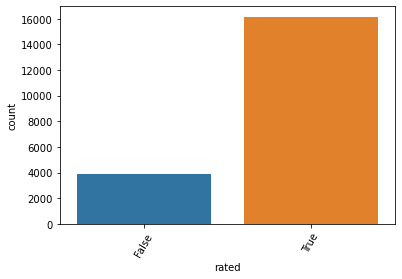

In [27]:
sns.countplot(x="rated", data =train_new)
plt.xticks(rotation = 60)
plt.show()

In [28]:
#rated

train_new["rated"] = [ 0 if i == True
                        else 1 for i in train_new["rated"]]



In [29]:
train_new.rated
train_new["rated"].value_counts()

0    16155
1     3903
Name: rated, dtype: int64

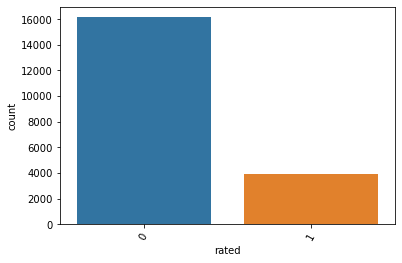

In [30]:
sns.countplot(x="rated", data =train_new)
plt.xticks(rotation = 60)
plt.show()

In [31]:
#winner

train_new["winner"] = [ 0 if i == "white"
                        else 1 if i == "black"
                        else 2 for i in train_new["winner"]]



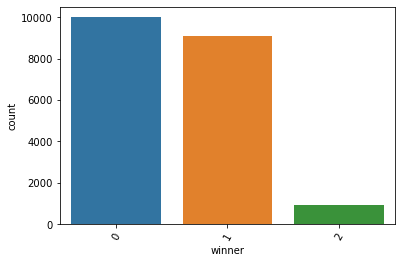

In [32]:
sns.countplot(x="winner", data =train_new)
plt.xticks(rotation = 60)
plt.show()

In [33]:
#victory_status

train_new["victory_status"] = [ 0 if i == "resign"
                                else 1 if i == "mate"
                                else 2 if i == "outoftime"
                                else 3 for i in train_new["victory_status"]]

 

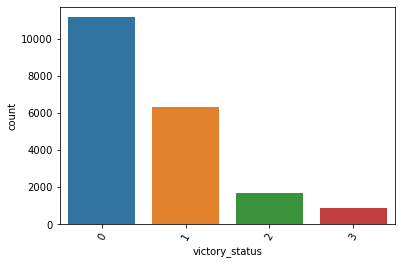

In [34]:
sns.countplot(x="victory_status", data =train_new)
plt.xticks(rotation = 60)
plt.show()

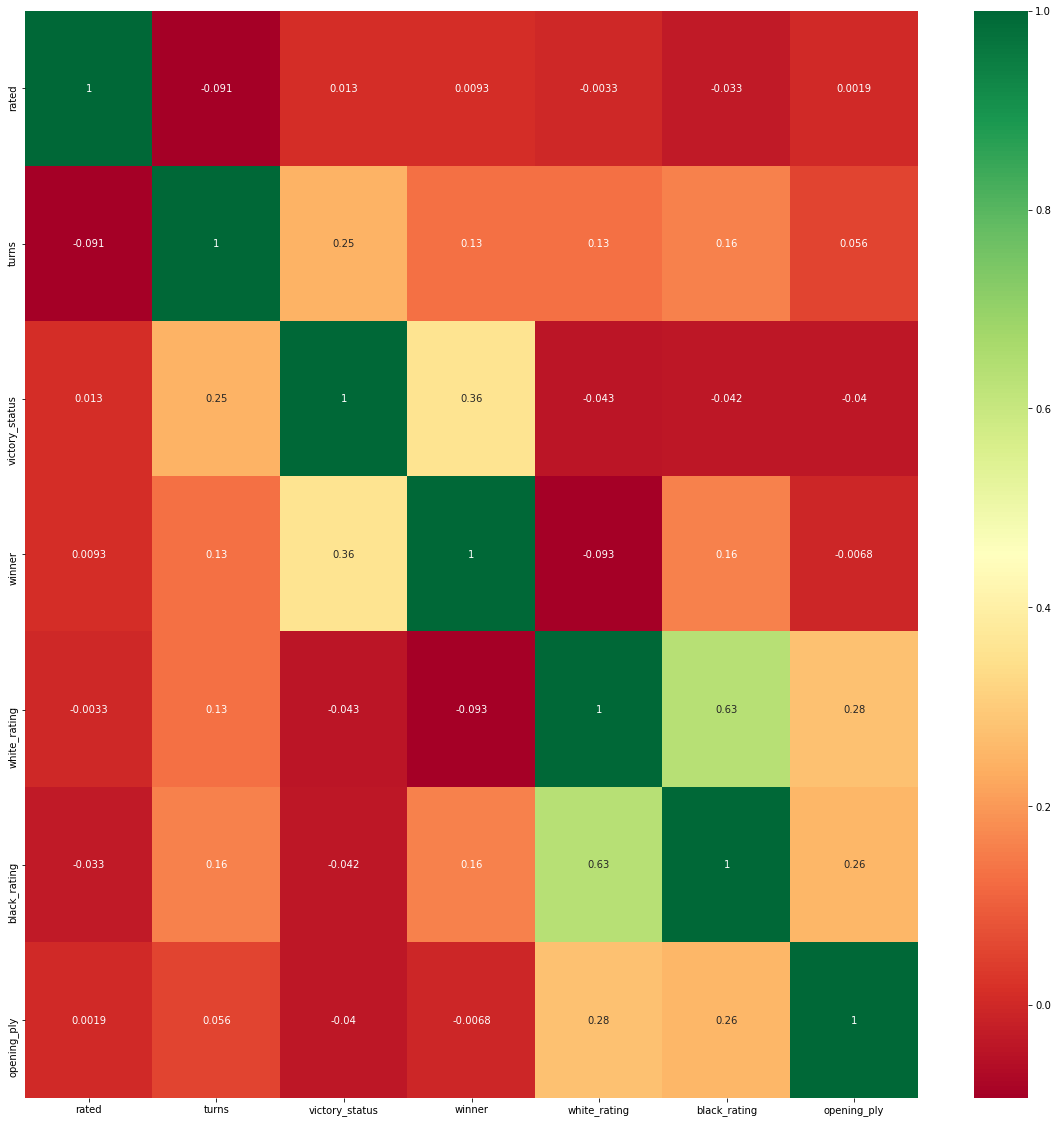

In [35]:
#get correlations of each features in dataset
corrmat=train_new.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(train_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [36]:
#The heatmap that victory_status and turns has relatively high postive relationship 
#with winner. 
#So we will drop the features apart from this.
#Multicollineraity means that the independent variables need to be uncorrelated with each other. 
#We also need to check if these variables are related with eachother.

In [37]:
print(train_data[["turns","victory_status"]].corr())

       turns
turns    1.0


In [102]:
#victory_status and turn has high correlation-Multicollinearity occurs, so remove one variable 

In [103]:
train_new=train_new.drop(["turns"],axis=1)

In [104]:
train_new.head()

,rated,victory_status,winner,white_rating,black_rating,opening_ply
0,1,2,0,1500,1191,5
1,0,0,1,1322,1261,4
2,0,1,0,1496,1500,3
3,0,1,0,1439,1454,3
4,0,1,0,1523,1469,5


In [105]:
train = train_new[:20058]
train.head()

,rated,victory_status,winner,white_rating,black_rating,opening_ply
0,1,2,0,1500,1191,5
1,0,0,1,1322,1261,4
2,0,1,0,1496,1500,3
3,0,1,0,1439,1454,3
4,0,1,0,1523,1469,5


In [106]:
X = train.drop(labels = "winner", axis = 1)
y = train["winner"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 16046
X_test 4012
y_train 16046
y_test 4012


In [108]:
# model accuracy
result = []

# RANDOM FOREST

In [109]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state= 59)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)

RESULT
Random Forest Model Acc :  0.6612662013958126


In [110]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy: 0.661
Confusion matrix, without normalization


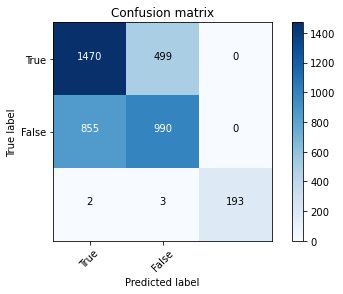

In [111]:
plot_confusion_matrix

from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred_random_forest)
print("accuracy: %0.3f" %score)

cm = metrics.confusion_matrix(y_test,y_pred_random_forest)
plot_confusion_matrix(cm, classes=['True', 'False'])

In [116]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      1969
           1       0.66      0.54      0.59      1845
           2       1.00      0.97      0.99       198

    accuracy                           0.66      4012
   macro avg       0.77      0.75      0.75      4012
weighted avg       0.66      0.66      0.66      4012



# XGBCLASSIFIER

In [120]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RESULT
XGBoost Model Acc :  0.6650049850448654


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [121]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix    

<function __main__.plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x000001E7A8D86730>)>

accuracy:   0.665
Confusion matrix, without normalization


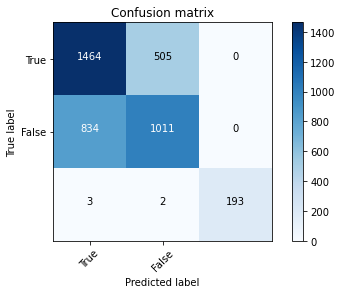

In [122]:
from sklearn import metrics
import itertools

score = metrics.accuracy_score(y_test, y_pred_xgb)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test,y_pred_xgb)
plot_confusion_matrix(cm, classes=['True', 'False'])

In [123]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1969
           1       0.67      0.55      0.60      1845
           2       1.00      0.97      0.99       198

    accuracy                           0.67      4012
   macro avg       0.77      0.76      0.76      4012
weighted avg       0.67      0.67      0.66      4012

